In [ ]:
!wget -O NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true

--2025-04-28 06:17:01--  https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/notofonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true [following]
--2025-04-28 06:17:01--  https://github.com/notofonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/notofonts/noto-cjk/raw/refs/heads/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf [following]
--2025-04-28 06:17:02--  https://github.com/notofonts/noto-cjk/raw/refs/heads/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf
Reusing existing connection to github.com:4

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.font_manager.fontManager.addfont("NotoSansCJKtc-Regular.otf")
plt.rcParams["font.sans-serif"] = ["Noto Sans CJK TC"]
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls'
excel_data = pd.ExcelFile(url)

area = ['新北市', '臺北市', '桃園市', '臺中市', '臺南市', '高雄市']
year = [str(i) for i in range(112, 98, -1)]

df = pd.DataFrame()
for sheet_name in excel_data.sheet_names:
    if sheet_name in year:
        df_yr = pd.read_excel(excel_data, sheet_name=sheet_name, header=4)
        df_yr = df_yr.iloc[:, 0:2]
        df_yr.iloc[:, 0] = df_yr.iloc[:, 0].str.replace(" ", "")
        df_yr.columns = ['county', 'births']
        df_yr = df_yr[df_yr['county'].isin(area)]
        df_yr.loc[:, 'year'] = f'{sheet_name:>03}'
        df = pd.concat([df, df_yr], ignore_index=True)

df

<ipython-input-3-24fd5f5131b0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yr.loc[:, 'year'] = f'{sheet_name:>03}'


,county,births,year
0,新北市,18157.0,112
1,臺北市,15920.0,112
2,桃園市,17662.0,112
3,臺中市,16813.0,112
4,臺南市,9241.0,112
...,...,...,...
75,新北市,27493,099
76,臺北市,18677,099
77,臺中市,19518,099
78,臺南市,11657,099


In [ ]:
p1=pd.pivot_table(df,index="year",values="births",aggfunc="mean")
p1

,births
year,
099,19184.0
100,24066.4
101,28927.0
102,24209.0
103,24953.833333
104,25319.333333
105,24609.833333
106,23142.166667
107,21468.333333


<Axes: xlabel='year'>

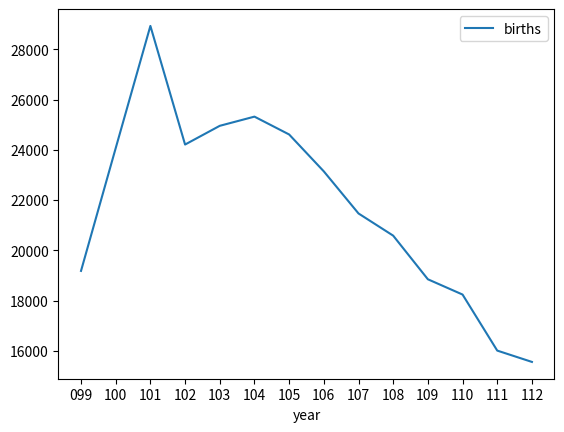

In [ ]:
import seaborn as sns
sns.lineplot(data=p1)

In [ ]:
p2=pd.pivot_table(df,index="year",columns="county",values="births")
p2

county,新北市,桃園市,臺中市,臺北市,臺南市,高雄市
year,,,,,,
099,27493.0,NaN,19518.0,18677.0,11657.0,18575.0
100,34682.0,NaN,24256.0,25439.0,14340.0,21615.0
101,41935.0,NaN,28971.0,30232.0,18030.0,25467.0
102,35188.0,NaN,24069.0,26175.0,14479.0,21134.0
103,38563.0,17471.0,26381.0,29174.0,15526.0,22608.0
104,36078.0,22513.0,26181.0,28865.0,15757.0,22522.0
105,34148.0,23752.0,25653.0,27785.0,14630.0,21691.0
106,31621.0,23430.0,24410.0,25004.0,13914.0,20474.0
107,28745.0,22568.0,22518.0,22663.0,12275.0,20041.0


<Axes: xlabel='year'>

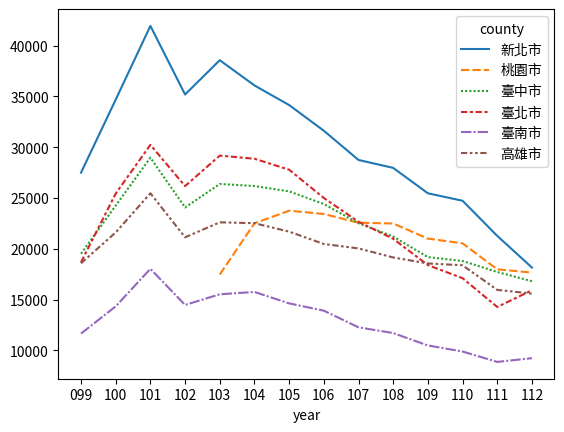

In [ ]:
sns.lineplot(data=p2)

In [ ]:
p3=pd.pivot_table(df,index="county",values="births",aggfunc=["mean","max","min"])
p3

,mean,max,min
,births,births,births
county,,,
新北市,30431.642857,41935.0,18157.0
桃園市,20941.7,23752.0,17471.0
臺中市,22549.0,28971.0,16813.0
臺北市,22907.857143,30232.0,14279.0
臺南市,12915.285714,18030.0,8870.0
高雄市,20126.142857,25467.0,15589.0


<Axes: xlabel='county', ylabel="('mean', 'births')">

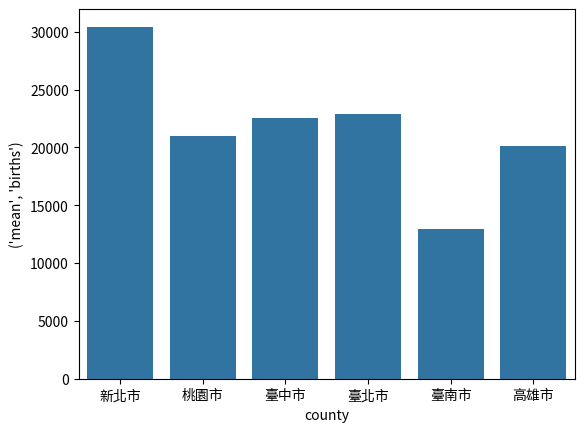

In [ ]:
sns.barplot(data=p3,x="county",y=("mean","births"))

<Axes: xlabel='county', ylabel='births'>

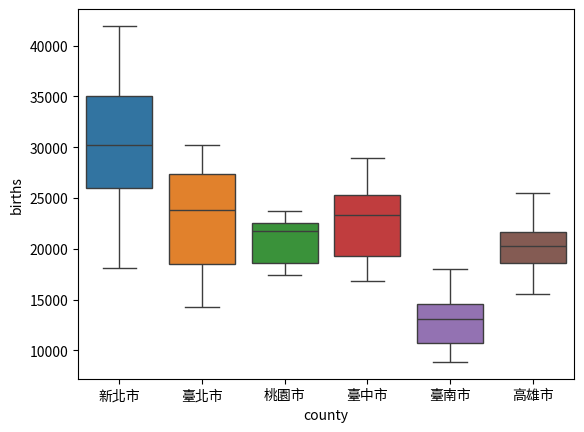

In [ ]:
sns.boxplot(data=df,x="county",y="births",hue="county")